# 4. Classification

## 4.2 Why not linear Regression
- 정성적 변수 : 결과의 순서에 대한 순서가 존재함 ex. 경중, 중증, 위험군 환자
  - 정량적 변수의 경우 1,2,3 등의 서로의 값들의 갭이 비슷하나, 정성적 변수의 경우, 1,2간의 갭이 1,3과의 갭 크기와 같지 않는 순서가 있다. 이런 갭을 선형회귀에서는 감안해줄 수가 없다.
  - 이진 분류라면 dummy variable을 이용하여 처리할 수 (3.3.1) 있으나, 해석하기에 좀 난해한 단점도 존재


## 4.3 Logistic regression
- 로지스틱 회귀 : Y가 특별한 클래스에 속할 확률 모델링
  
### 4.3.1 The Logistic Model
- $ p(X) = Pr(Y=1|X) $과 X의 관계 모델링 (이진분류 가정)
- 선형 회귀 진행 시, 0,1을 벗어나는 값을 결과로 내놓는다. 그래서 (0, 1)의 범위를 가지는 logistic function을 적용한다. $$ p(X) = \frac{e^{\beta_0 +\beta_1X}}{1+e^{\beta_0+\beta1X}}$$
  - S-shaped 곡선의 형태를 가지며, 감지 가능한 예측 가능
  - $$ \frac{p(X)}{1-p(X)}=e^{\beta_0+\beta_1X}$$
  - $ \frac{p(X)}{1-p(X)} $ : odds(오즈) -> 분류에 있어서 확률 대신 사용됨
  - 
- 해당 모델 적용을 위해 maximum likelihood 적용

### 4.3.2 Estimating the Regression Coefficients
- maximum likelihood : $\beta_0, \beta_1$의 추정치는, 각 예상치 확률이, 각 추정치의 관측치와 최대한 가깝게 되도록
- likelihood function
  $$ l(\beta_0,\ \beta_1) = \prod_{i:y_i=1}p(x_i)\prod_{i':y_{i'}=0}(1-p(x_{i'})) $$
  : $\beta_0,\ \beta_1$은 이 likelihood function이 최소회 되는 값을 선택한다 

* Maximum Likelihood Estimation : 파라미터 $\theta$로 구성된 어떤 확률밀도함수 $P(x|\theta)$에서 관측된 표본 데이터$x=(x_1,...,x_n)$일 때 표본으로부터 파라미터 추정하는 방법
  * likelihood : 지금 얻은 데이터가 이 분포로부터 나왔을 가능도. *각 데이터 샘플에서 후보 분포에 대한 높이(likelihood 기여도)를 계산해서 다 곱한 것* -> 곱하는 것은 모든 데이터 추출이 독립적이기 때문
  $$ P(x|\theta) = \prod^n_{k=1}P(x_k|\theta) \\ L(\theta|x)=logP(x|\theta) = \sum^n_{i=1}logP(x_i|\theta) $$
  * 해당 likelihood function의 최대값 : 미분계수 이용. 찾고자 하는 파라미터에 대하여 편미분 후 0이 되도록 하는 파라미터를 찾기
  $$\frac{\partial}{\partial\theta}L(\theta|x)= \frac{\partial}{\partial\theta}logP(x|\theta)=\sum^n_{i=1}\frac{\partial}{\partial\theta}logP(x_i|\theta)=0$$
  * 평균 $\mu$와 $\sigma^2$를 모르는 정규분포를 가정하고, 여기서 추출한 값을 통해 모 분포의 평군과 분산 추정
    * 정규 분포 가정 시, 표본분포는 $$f_{\mu,\sigma^2}(x_i)=\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(x_i-\mu)^2}{2\sigma^2})$$
    * 독립추출 가정 $$ P(x|\theta)=\sum^n_{i=1}f_{\mu,\sigma^2}(x_i)=\sum^n_{i=1}\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(x_i-\mu)^2}{2\sigma^2}) $$
    * 로그 우도 $$ L(\theta|x)=\sum^n_{i=1}log\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(x_i-\mu)^2}{2\sigma^2}) = \sum^n_{i=1}{log(exp(-\frac{(x_i-\mu)^2}{2\sigma^2}))-log(\sigma\sqrt{2\pi})} = \sum^n_{i=1}{-\frac{(x_i-\mu)^2}{2\sigma^2}-log(\sigma)-log(\sqrt{2\pi})} $$
     * $\mu, \sigma$로 편미분
    $$ \frac{\partial L(\theta|x)}{\partial \mu}=\frac{1}{2\sigma^2}\sum^n_{i=1}\frac{\partial}{\partial\mu}(x^2_i-2x_i\mu+\mu^2)=-\frac{1}{2\sigma^2}\sum^n_{i=1}(-2x_i+\mu)=\frac{1}{\sigma^2}\sum^n_{i=1}(x_i-\mu)=\frac{1}{\sigma^2}(\sum^n_{i=1}x_i-n\mu)=0 \\ \frac{\partial L(\theta|x)}{\partial \sigma} = -\frac{n}{\sigma}-\frac{1}{2}\sum^n_{i=1}(x_i-\mu)^2\frac{\partial}{\partial \sigma}(\frac{1}{\sigma^2} = -\frac{n}{\sigma}+\frac{1}{\sigma^3}\sum^n_{i=1}(x_i-\mu)^2=0$$

- reference : https://angeloyeo.github.io/2020/07/17/MLE.html

### 4.3.3 Making Prediction
$$ \hat{p}(X)=\frac{e^{\hat{\beta_0}+\hat{\beta_1}X}}{1+e^{\hat{\beta_0}+\hat{\beta_1}X}}

### 4.3.4 Multiple Logistic Regression
$$ \hat{p}(X)=\frac{e^{\hat{\beta_0}+\hat{\beta_1}X_1+...+\hat{\beta}_pX_p}}{1+e^{\hat{\beta_0}+\hat{\beta_1}X_1+...+\hat{\beta}_pX_p}}

### 4.3.5 Multinomial Logistic Regression
- 이분로지스틱 회귀는 2개 이상의 클래스로 확장될 수 있다 : 한 클래스를 베이스라인으로 선택하고, 일반성을 잃지 않는 선에서 K번째 클래스를 선택
$$ Pr(Y=k|X=x) = \frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{kp}pX_p}}{1+\sum^{K-1}_{l=1}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}pX_p}} $$
- 다항로지스틱회귀는 베이스라인 클래스 선택에 따라 해석이 바뀔 수 있다
- 다항 로직스틱회귀 대체 : softmax coding => 모든 K 클래스들을 대칭이 되게끔 취급한다
  $$ Pr(Y=k|X=x) = \frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{kp}pX_p}}{\sum^{K}_{l=1}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}pX_p}} $$

## 4.4 Generative Models for Classification
- logistic regression : 로지스틱 함수를 사용해 직접적으로 $Pr(Y=k|X=x)$(조건부 확률)를 모델링
  - 각 종속변수 Y에 대한 독립변수 X의 분포를 모델링
- Bayes' Theorem : 각 클래스에 대한 X의 정규분포로 가정하면, 모델은 로지스틱 회귀와 비슷해짐
  - 이 방법이 필요한 이유
    - 두 클래스 간 매우 큰 분리가 있을 경우, 로지스틱 회귀모델의 파라미터 예측은 매우 불안정
    - 독립변수 분포가 정규분포이고 샘플 수가 적을경우, 이 접근법이 더 정확
    - 이 방법은 2 이상 클래스의 방법으로 자연스럽게 확장
  - $\pi_k$ : prior -> k번째 클래스에 대한 임의로 선택된 관측치
  - k번째 클래스의 밀도함수 : $f_k(X) \equiv Pr(X|Y=k) =\frac{\pi_kf_k(x)}{\sum^K_{l=1}\pi_lf_l(x)}$
    - posterior : x라는 관측이 k 클래스에 속할 확률.
    - 직접 posterior를 구하는 것 보다 $\pi_k, f_k(x)$의 예측치를 대입할 수 있다. 모집단에서 임의의 표본을 추출하는 경우 $pi_k$를 추정하는 것이 일반적으로 더 쉬운 방법이다.
    - 하지만 $f_k(x)$는 더 어려운데, 몇 가지 가정이 필요하다
  - $f_k(x)$ 예측치를 구할 수 있는 세 가지 방법을 볼 것 : linear discriminant analysis, quadratic discriminant anlysis, naive Bayes

### 4.4.1 Linear Discriminant Analysis for p=1
- p : predictor
- $p_k(x)$를 구할 수 있는 $f_k(x)$를 구하고 $p_k(x)$가 가장 큰 클래스로 분류할 수 있다
- $f_k(x)$를 정규분포로 가정, 1D일 경우. $$f_k(x)=\frac{1}{\sqrt{2\pi}\sigma_k}exp(-\frac{1}{2\sigma^2_k}(x-\mu_k)^2) $$
- $\sigma_1^2=...=\sigma_K^2$ 가정 : $$ p_k(x)=\frac{\pi_k\frac{1}{\sqrt{2\pi}\sigma_k}exp(-\frac{1}{2\sigma^2_k}(x-\mu_k)^2)}{\sum^K_{l=1}\frac{1}{\sqrt{2\pi}\sigma_k}exp(-\frac{1}{2\sigma^2_k}(x-\mu_l)^2)}$$
  - $\pi$는 원주율이 아니라 관측치가 k 클래스로 분류될 prior 확률 임을 잊지 말기
- 로그를 취하고 재정리 -> 관측치들을 $$ \delta_k(x)=x\times\frac{\mu_k}{\sigma^2}-\frac{\mu^2_k}{2\sigma^2}+log(\pi_k)$$ 가 가장 큰 클래스로 분류하는 것
- 실제로는 데이터가 정규분포에서 샘플링 되었다고 확신이 들어도, $\mu, \pi, \sigma^2$는 예측해야 한다.
- Linear Discriminant Analysis (LDA)는 구한 $\mu, \pi, \sigma^2$를 $\delta$식에 넣어서 베이지안 분류기를 근사한다 $$ \hat{\mu_k}=\frac{1}{n_k}\sum_{i:y_i=k}x_i\\ \hat{\sigma}^2=\frac{1}{n-K}\sum^K_{k=1}\sum_{i:y_i=k}(x_i-\hat{\mu_k})^2$$
 - n :  모든 훈련 데이터 수  /  $n_k$ : k번째 클래스의 데이터 수   / $\mu_k$ : k번째 클래스에 속하는 모든 관측치의 평균   / $\hat{\sigma^2}$: 각 클래스의 샘플 분산의 가중평균
- 가끔 $\pi_1, ..., \pi_k$를 미리 알아서 직접적으로 사용가능한 경우 존재. 그런 데이터가 없으면 LDA에서는 k번째 클래스에 속하는 데이터 개수 비율을 통해서 $pi_k$를 예측한다 $$\hat{\pi_k}=n_k/n \\ \hat{\delta_k}(x)= x \times\frac{\hat{\mu_k}}{\hat{\sigma^2}}-\frac{\hat{\mu_k}^2}{2\hat{\sigma^2}}+log(\hat{\pi_k})$$
  - linear은 위의 식이 선형 함수라서 그렇다
- LDA 분류기는 각 클래스가 정규분포이며, 클래스 별 특정 평균과 공통 분산을 가정하고, 해당 예측치를 베이지안 분류기에 대입한다.
- 4.4.3에서 클래스별 특정 분산이 있는 경우를 다룬다

### 4.4.2 Linear Discriminant Anlaysis for p>1
- 데이터는 다변량 정규분포를 가정하며, 클래스별 특정한 평균과 공통의 공분산을 가정한다
  - 다변량 정규분포 : 각 독립변수가 1차원 정규분포를 따름, 각 독립변수 간 상관성 존재 -> 상관성이 있는 경우 bell shape가 타원형 
  $$ X\sim N(\mu,N) \\ f(x)=\frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)) \\ \delta_k(x)=x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+log\pi_k$$
  - 모르는 파라미터인 $\mu, \pi, \Sigma$ 예측 필요. $\hat{\delta}$ 를 구하고 가장 큰 값에 해당 클래스로 분배함.
- 이진분류시, confusion matrix를 활용하면 클래스 분류의 오류를 잘 살펴볼 수 있음
  - False Positive rate = FP/N : Type 1 error, 1-specificity
  - True Positive rate = TP/P : 1-Type2 error, power, sensitivity, recall
  - Positive Predicted value = TP/P : precision, 1-false discovery proportion
  - Negative Predicted value=TN/N
- AUC (Area Under the ROC Curve) : 면적이 클수록 좋은 분류기

### 4.4.3 Quadratic Discriminant Analysis
- LDA처럼 각 관측이 정규분포로 부터 추출되고, 파라미터 예측값을 Bayes' theorem에 대입하여 예측
- 하지만, 각 클래스가 각각의 다른 공분산을 가정 $ X \sim N(\mu_k,\Sigma_k) $
  $$ \delta_k=-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}_k(x-\mu_k)-\frac{1}{2}log|\Sigma_k|+log\pi_k = -\frac{1}{2}x^T\Sigma^{-1}_kx+x^T\Sigma^{-1}_k\mu_k-\frac{1}{2}\mu^T_k\Sigma^{-1}_k\mu_k-\frac{1}{2}log|\Sigma_k|+log\pi_k$$
- 공분산이 공통인 것을 각각 다른 것보다 왜 선호하는가? bias-variance trade-off
  - p 독립변수들이 있을 때 공분산 행렬을 찾기 위해 p(p+1)/2개의 파라미터가 필요
  - QDA는 클래스 별 공붓나이 다르므로 Kp(p+1)/2개 파라미터 필요 : 큰 variance
  - LDA는 x에 선형이라 Kp개의 coefficients 만 필요 : 큰 bias
  - QDA는 데이터셋이 커서 variance가 큰 문제가 되지 않을때나 공통 공분산 가정을 사용할 수 없을 경우 추천

### 4.4.4 Naive Bayes
- 베이즈 정리 : $\pi, f$를 이용하여 posterior $p_k(x)=Pr(Y=l|X=x)$를 구함, $\pi, f$의 예측 필요, $\pi$는 훈련 데이터 중 k 클래스에 해당하는 비율 등으로 쉽게 구할 수 있음
- $f$를 구하는 것은 조금 더 복잡. : 해당 클래스의 p차원 밀도함수
  - LDA는 클래스 특별 평균 및 같은 공분산이라는 가정 -> K개의 p차원 평균 벡터 & 1 or K개의 p x p 공분산 행렬 구하기
- naive bayes : **k번째 클래스에서, p 독립변수들은 독립적**이라고 가정 => $$ f_k(x) = f_{k1}(x_1) \times f_{k2}(x_2) \times ... \times f_{kp}(x_p) $$
  - p차 밀도함수가 어려운 이유는 각 독립변수의 분포 뿐만 아니라 각자의 결합 분포도 고려해야하기 때문 : 공분산 행렬의 대각성분을 제외한 성분 고려하지 않아도 됨
  - 그렇게 가정해도 되나? 대부분의 경우는(+데이터 수가 독립변수의 종류보다 적을 경우) 아니다. 하지만 그렇게 가정해도 좋은 결과를 보인다. 
  - 해당 가정은 큰 bias와 줄어든 variance를 만들고, bias-variance trade-off로 인한 좋은 분류 효과를 생성한다
  $$ Pr(Y=k|X=x) =\frac{\pi_k\times f_{k1}(x_1)\times f_{k2}(x_2) \times ... \times f_{kp}(x_p)}{\sum^K_{l=1}\pi_l\times f_{l1}(x_1)\times f_{l2}(x_2) \times ... \times f_{lp}(x_p)}$$
- 훈련데이터를 통한 1차원 밀도 함수 추정
  - $X_j$가 정량적일 경우, $X_j|Y = k \sim N(\mu_{jk},\sigma^2_{jk})$ 가정 가능 : 각 클래스의 j번째 독립변수는 정규분포에서 추출됨
    - QDA와 비슷하나, 여기서 독립변수들은 독립적이라는 가정이 포함됨
  - $X_j$가 정량적일 경우, $f_{kj}$의 비모수적 추정을 할 수도 있다. 각 클래스의 j번째 독립변수 관측에 대한 히스토그램 생성 -> 같은 j번째 히스토그램에 속하는 k 번째 클래스의 훈련데이터 비율
  - $X_j$가 정성적일 경우, 각 클래스에 해당하는 j번째 독립변수의 훈련데이터 비율로 봐도 됨
- Naive Bayes가 LDA, QDA보다 성능이 훨씬 좋음 : variance 줄이는 것의 중요성

## 4.5 A Comparison of Classification Methods
### 4.5.1 An Analytical Comparison
- $Pr(Y=k|X=x)$를 최대화하는 클래스에 관측치를 배분. K를 베이스라인 삼고 다음을 최대화하는 클래스에 관측치 배분$$ log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}) $$
1) LDA : 베이즈 정리와 각 독립변수가 특정 평균과 공통된 공분산 행렬을 가진 다변량정규분포에서 추출되었다고 가정 
   $$log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}) = log(\frac{\pi_k f_k(x)}{\pi_K f_K(x)})=log(\frac{\pi_k exp(-\frac{1}{2}(x-\mu_k)^T \Sigma^{-1}(x-\mu_k))}{\pi_K exp(-\frac{1}{2}(x-\mu_K)^T \Sigma^{-1}(x-\mu_K))}) \\ = log(\frac{\pi_k}{\pi_K})-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)+\frac{1}{2}(x-\mu_K)^T\Sigma^{-1}(x-\mu_K)\\=log(\frac{\pi_k}{\pi_K})-\frac{1}{2}(\mu_k+\mu_K)^T\Sigma^{-1}(\mu_k-\mu_K)+x^T\Sigma^{-1}(\mu_k-\mu_K)=a_k+\sum^p_{j=1}b_{kj}x_j \\where\ a_k=log(\frac{\pi_k}{\pi_K})-\frac{1}{2}(\mu_k+\mu_K)^T\Sigma^{-1}(\mu_k-\mu_K)\ and\ b_{kj}:\ jth\ component\ of \Sigma^{-1}(\mu_k-\mu_K)$$
   - 로지스틱 회귀같이 posterior 확률의 log 오즈가 x에 대해 선형적이라고 가정
2) QDA $$ log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}) = a_k+\sum^p_{j=1}b_{kj}x_j+\sum^p_{j=1}\sum^p_{l=1}c_{kjl}x_jx_l\\where\ a_k,b_{kj},c_{kjl}\ are\ functions\ of\ \pi_k, \pi_K, \mu_k, \mu_K, \Sigma_k, \Sigma_K$$ 
   - posterior 확률의 log 오즈가 x에 대해 선형적이라고 가정
3) Naive Bayes $$ log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}) = log(\frac{\pi_k f_k(x)}{\pi_K f_K(x)})= log(\frac{\pi_k\prod^p_{j=1}f_{kj}(x_j)}{\pi_K\prod^p_{j=1}f_{Kj}(x_j)})\\=log(\frac{\pi_k}{\pi_K}+\sum^p_{j=1}log(\frac{f_{kj}(x_j)}{f_{Kj}(x_j)}) = a_k + \sum^p_{j=1}g_{kj}(x_j)\\where\ a_k=log(\frac{\pi_k}{\pi_K},\ g_{kj}(x_j)=log(\frac{f_{kj}(x_j)}{f_{Kj}(x_j)})$$
   - generalized additive model의 형태를 띔

- LDA : $c_{kjl}=0$ 인 QDA의 특별케이스
  - LDA는 $\sum_1=...=\sum_K=\sum$인 한정적인 QDA이므로 당연
- 선형 결정경계를 만드는 모든 분류기는 $g_{kj}(x_j)=b_{kj}x_j$인 naive bayes의 특별한 케이스이다. LDA도 naive bayes의 특별케이스이다.
- 1D 정규분포 $N(\mu_{kj},\sigma^2_j)$를 사용하는 naive Bayes 분류기의 $f_{kj}(x_j)$를 모델링하면, $g_{kj}(x_j)=b_{kj}x_j,\ b_{kj}=(\mu_{kj}-\mu_{Kj})/\sigma^2_j$가 된다. 이 경우 naive bayes는 $\sum$의 대각성분이 $\sigma_j^2$인 공분산 행렬로 제한된다
- QDA와 naive bayes 모두 각자의 특별 케이스가 아니며, naive bayes가 g_{kj}(x_j)의 선택가능한 폭이 더 넓으므로 더 유연한 모델이다. 하지만 additive fit에 제한되며 multiplied는 되지 않는다. 하지만 QDA는 multiplicative terms가 포함된다($c_{kjl}x_jx_l$). 따라서 QDA가 교호작용이 있는 데이터에 더 맞을 수도 있다.
- 각 방법이 무조건적으로 좋은 것이 아니며, 독립변수의 분포, 데이터의 갯수, bias-variance trade-off 등에 따라 다르다.
- logistic regression $$ log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}) = \beta_{k0} + \sum^p_{j=1}\beta_{kj}x_j$$
  - LDA의 선형 형태와 같다. LDA의 경우 선형 함수의 계수가 $\pi_k, \pi_K, \mu_k, \mu_K, \sum(normal dist.)$의 추정치의 함수. logistic regression의 경우 MLE로부터 정해진다. 따라서 정규분포 가정이 가능할 경우 LDA, 그렇지 않은 경우에는 LDA가 더 낫다.
- KNN (비모수적 추정)과의 비교
  - 완전한 비모수적 추정 : 결정 경계가 비선형적이고 데이터가 많을 때 KNN이 나을 것
  - 정확한 분류를 위해 KNN은 독립변수의 갯수에 비해 더 많은 데이터 수를 요구. 비모수적 추정은 variance를 크게 가져간다
  - 경계가 비선형적이지만, 데이터 수가 그렇게 많지는 않을 때, QDA가 더 나을 수 있다. non-linear parametric form을 어느정도 가져갈 수 있음
  - KNN은 어느 독립변수가 중요한지 알 수 없다. 계수가 없기 때문


## 4.6 Generalized Linear Models
- target이 정성적이도 정량적이지도 않은 경우
### 4.6.1 Linear Regression on the Bikeshare Data
- 데이터의 예측 결과의 standard deviation이 많이 흔들리는 경우, variance가 일정해야 하는 선형회귀 모델의 가정을 무너뜨리므로 재고 필요 / prediction이 negative value가 나오면 안되는데 나오는 경우 등. => target 자체를 log화 시켜줄 수 있음. 해석에 어려움이 있을 수도 있다. 

### 4.6.2 Poisson Regression on the Bikeshare Data
- 포아송 분포. 타겟 분포가 음수가 아닌 정수의 형태를 갖출 때, 포아송 분포를 따르면 $$Pr(Y=k)=\frac{e^{-\lambda}\lambda^k}{k!} ,\ for\ k=0,1,2,...$$
  - $\lambda>0$는 Y의 기댓값이자 Y의 분산 : Y가 포아송 분포를 따를 경우, 평균이 크면 분산도 크다.
  - 포아송 분포는 대부분 횟수를 모델링하는데 쓰인다 : 결과가 음수가 아닌 정수, 
    - ex. $suppose \lambda=5, 특정\ 시간에\ 사용자가\ 없을\ 경우\ : Pr(Y=0)=\frac{e^{-5}5^0}{0!}=0.0067$
- 실제 평균 유저는 시간, 월, 날짜 등에 의해 바뀔 수 있다. 그래서 다중 변수 함수를 통해서 평균의 변화를 모델링해본다 $$ log(\lambda(X_1,...,X_p))=\beta_0+\beta_1X_1+...+\beta_pX_p $$
- $\lambda$의 로그함수는 X에 대하여 선형 : 음수를 가지게 하지 않기 위하여
- $\beta$들을 추정하기 위해서 logistic regression에 쓴 MLE를 사용한다. $$l(\beta_0, \beta_1, ..., \beta_p)=\prod^n_{i=1}\frac{e^{-\lambda(x_i)}\lambda(x_i)^{y_i}}{y_i!} \\where\ \lambda(x_i)=e^{\beta_0+\beta_ix_{i1}+...+\beta_px_{ip}}$$

- 선형회귀와 포아송 회귀의 차이
  - 해석 : X가 1 단위로 상승하는 것은 exp(-$\beta_j$)만큼 변한다.
  - mean-variance 관계 : 포아송 분포에서는 $lambda$=mean=variance. / 선형회귀에서는 분산이 일정한 값을 가진다. 그래서 포아송분포에서 더 mean-variance 관계를 모델할 수 있따.
  - 음수가 아닌 fitted values

### 4.6.3 Generalized Linear Models in Greater Generality
- linear, logistic, poisson 회귀 모델의 공통정
  1) 각 모델은 타겟 Y를 예측하기 위해 독립변수들을 사용
   - Y가 X의 조건부 분포에 속함을 가정 : 선형 -> 정규분포 / 로지스틱 -> 베르누이 / 포아송 -> 포아송
  2) 각 모델은 독립변수들의 함수로 종속변수의 평균을 구함
   $$ E(Y|X_1,...,X_p)=\beta_0+\beta_1X_1+...+\beta_pX_p \\ E(Y|X_1,...,X_p)=Pr(Y=1|X_1,...,X_p) = \frac{e^{\beta_0+\beta_1X_1+...+\beta_pX_p}}{1+e^{\beta_0+\beta_1X_1+...+\beta_pX_p}} \\ E(Y|X_1,...,X_p)=\lambda(X_1,...,X_p)=e^{\beta_0+\beta_1X_1+...+\beta_pX_p} $$
   - link function $\eta$를 통해서 나타낼 수 있음 -> 변형된 독립변수 선형 함수
  $$ \eta(E(Y|X_1,...,X_p))=\beta_0+\beta_1X_1+...+\beta_pX_p \\ \eta(\mu)=\mu(linear),\ log(\mu/(1-\mu))(logistic),\ log(\mu)(poisson) $$
- 정규, 베르누이, 포아송 분포는 모두 지수족 함수. 지수분포(감마분포), negative binomial 분포도 있음
- 일반적으로 특정 지수족으로부터 생기는 종속변수 Y를 모델링하고, 해당 결과의 평균을 변형하여, 독립변수들의 선형함수로 만든다. 이를 따르는 모델을 *Generalized linear model*(GLM)이라고 한다. 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [47]:
## 4.7 : Lab Classification Methods
### 4.7.1 Stock Market Data
stock_df = pd.read_csv('../data/Smarket.csv')
stock_df.head()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [4]:
stock_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


<AxesSubplot:>

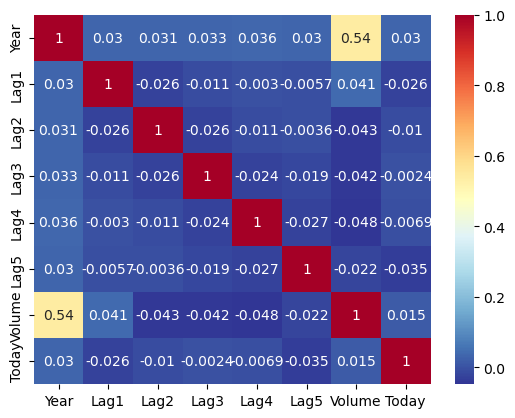

In [11]:
stock_df_features = stock_df.iloc[:,0:8]
sns.heatmap(stock_df_features.corr(),cmap='RdYlBu_r',annot=True)

In [48]:
### 4.7.2 logistic regression
# statsmodels
stock_glm1 = sm.GLM.from_formula('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=stock_df, family=sm.families.Binomial()).fit()
print(stock_glm1.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Mon, 26 Dec 2022   Deviance:                       1727.6
Time:                                          14:56:15   Pearson chi2:                 1.25e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.002868
Covariance Type:                              nonrobust                                         
                 coef    std e

- p-val이 커서 유의미한 관계를 의미하지는 않음

In [41]:
# confusion matrix
from sklearn.metrics import confusion_matrix

stock_glm1_preds_prob = stock_glm1.predict(stock_df.loc[:, stock_df.columns != 'Direction'])
stock_glm1_preds = [1 if prob>0.5 else 0 for prob in stock_glm1_preds_prob]
stock_df_target = [1 if result=='Up' else 0 for result in stock_df['Direction']]
print(confusion_matrix(y_true=stock_df_target, y_pred=stock_glm1_preds))
print((457+141)/1250)


[[457 145]
 [507 141]]
0.4784


In [61]:
# sckit-learn
# reference : https://deep-learning-study.tistory.com/621

import sklearn.linear_model as skl_lm
stock_lg_clf = skl_lm.LogisticRegression(solver='newton-cg').fit(stock_df_train_X, stock_df_train_y)
print(stock_lg_clf)
print('classes: ', stock_lg_clf.classes_)
print('coefficients: ', stock_lg_clf.coef_)
print('feature name: ', stock_lg_clf.feature_names_in_)
print('intercept : ', stock_lg_clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  ['Down' 'Up']
coefficients:  [[ 1.53706851e-01  3.67546516e-02 -8.11729793e-02  2.81206133e-02
   8.27284553e-03  8.16513891e-02 -2.03623033e-01  8.62461303e+00]]
feature name:  ['Year' 'Lag1' 'Lag2' 'Lag3' 'Lag4' 'Lag5' 'Volume' 'Today']
intercept :  [-307.54194713]


In [76]:
st

Index(['const', 'Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume',
       'Today'],
      dtype='object')

In [78]:
X_train = sm.add_constant(stock_df_train_X)
est = sm.Logit(stock_df_train_y, X_train).fit()
est.summary2()

         Current function value: 0.000000
         Iterations: 35


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                 Logit             Pseudo R-squared:  1.000      
Dependent Variable:    y                 AIC:               18.0005    
Date:                  2022-12-26 15:35  BIC:               62.1523    
No. Observations:      998               Log-Likelihood:    -0.00027265
Df Model:              8                 LL-Null:           -691.63    
Df Residuals:          989               LLR p-value:       2.3510e-293
Converged:             0.0000            Scale:             1.0000     
No. Iterations:        35.0000                                         
-----------------------------------------------------------------------
         Coef.      Std.Err.     z    P>|z|      [0.025       0.975]   
-----------------------------------------------------------------------
const  -4575.7064 565407.3027 -0.0081 0.9935 -1112753.6564 1103602.2435
Year       2.2490    282.5507  0.0080 0.9936     -551.5403     556.0383
Lag1      -3.7948    184.1025 -0.0206 0.9836     -364.6291     357.0395
Lag2       9.1126    204.8100  0.0445 0.9645     -392.3076     410.5328
Lag3      -1.0122    182.7650 -0.0055 0.9956     -359.2251     357.2007
Lag4       3.3766    266.1305  0.0127 0.9899     -518.2297     524.9829
Lag5       8.6345    166.1867  0.0520 0.9586     -317.0854     334.3544
Volume    59.8077    760.3729  0.0787 0.9373    -1430.4959    1550.1112
Today   1826.8229  36726.7787  0.0497 0.9603   -70156.3406   73809.9865
=======================================================================

"""

In [81]:
from sklearn.metrics import confusion_matrix

clf = skl_lm.LogisticRegression(solver='newton-cg').fit(stock_df_train_X, stock_df_train_y)
preds = clf.predict(stock_df_test_X)
print(confusion_matrix(y_true = stock_df_test_y, y_pred=preds))

[[108   3]
 [  0 141]]


In [74]:
stock_df_train = stock_df.loc[stock_df['Year'] < 2005]
stock_df_train_X = stock_df_train.loc[:, stock_df_train.columns != 'Direction']
stock_df_train_y = stock_df_train.loc[:, 'Direction']
stock_df_train_y = [1 if result=='Up' else 0 for result in stock_df_train_y]
stock_df_test = stock_df.loc[stock_df['Year'] >= 2005]
stock_df_test_X = stock_df_test.loc[:, stock_df_test.columns != 'Direction']
stock_df_test_y = stock_df_test.loc[:, 'Direction']
stock_df_test_y = [1 if result=='Up' else 0 for result in stock_df_test_y]
# print(stock_df_train_X.shape, stock_df_train_y.shape, stock_df_test_X.shape, stock_df_test_y.shape)


In [46]:
stock_glm2 = sm.GLM.from_formula('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=stock_df_train, family=sm.families.Binomial()).fit()
stock_glm2_preds_prob = stock_glm2.predict(stock_df_test_X)
stock_glm2_preds = [1 if prob>0.5 else 0 for prob in stock_glm2_preds_prob]
stock_glm2_target = [1 if result=='Up' else 0 for result in stock_df_test_y]
print(confusion_matrix(y_true = stock_glm2_target, y_pred=stock_glm2_preds))
print((34+97) / 252 )

[[34 77]
 [44 97]]
0.5198412698412699


In [86]:
### 4.7.3 Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

stock_lda = LinearDiscriminantAnalysis(solver='svd').fit(stock_df_train_X, stock_df_train_y)
lda_pred = stock_lda.predict(stock_df_test_X)
print(confusion_matrix(y_true=stock_df_test_y, y_pred=lda_pred))
print(classification_report(y_true=stock_df_test_y, y_pred=lda_pred, target_names=['Down', 'Up']))

[[100  11]
 [  1 140]]
              precision    recall  f1-score   support

        Down       0.99      0.90      0.94       111
          Up       0.93      0.99      0.96       141

    accuracy                           0.95       252
   macro avg       0.96      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252



In [88]:
### 4.7.4 Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

stock_qda = QuadraticDiscriminantAnalysis().fit(stock_df_train_X, stock_df_train_y)
qda_preds = stock_qda.predict(stock_df_test_X)
print(confusion_matrix(y_true=stock_df_test_y, y_pred=qda_preds))
print(classification_report(y_true=stock_df_test_y, y_pred=qda_preds, target_names=['Down', 'Up']))

[[101  10]
 [ 12 129]]
              precision    recall  f1-score   support

        Down       0.89      0.91      0.90       111
          Up       0.93      0.91      0.92       141

    accuracy                           0.91       252
   macro avg       0.91      0.91      0.91       252
weighted avg       0.91      0.91      0.91       252



In [92]:
### 4.7.5 Naive Bayes
from sklearn.naive_bayes import GaussianNB

stock_gnb = GaussianNB().fit(X=stock_df_train_X, y=stock_df_train_y)
gnb_preds = stock_gnb.predict(stock_df_test_X)
print(confusion_matrix(y_true=stock_df_test_y, y_pred=gnb_preds))
print(classification_report(y_true=stock_df_test_y, y_pred=gnb_preds, target_names=['Down', 'Up']))

[[104   7]
 [  7 134]]
              precision    recall  f1-score   support

        Down       0.94      0.94      0.94       111
          Up       0.95      0.95      0.95       141

    accuracy                           0.94       252
   macro avg       0.94      0.94      0.94       252
weighted avg       0.94      0.94      0.94       252



In [94]:
pr_preds

array([0.39646251, 0.36466716, 0.44538899, 0.52884716, 0.46183328,
       0.5202407 , 0.41096175, 0.53506318, 0.39012684, 0.56352736,
       0.61554992, 0.37626359, 0.39908069, 0.41505559, 0.44778916,
       0.53601393, 0.53820366, 0.48148895, 0.44850519, 0.59867307,
       0.57402158, 0.52039061, 0.44956343, 0.64041093, 0.47158702,
       0.49056785, 0.39167419, 0.54187911, 0.57859349, 0.48739641,
       0.52257811, 0.4837958 , 0.39852816, 0.49705154, 0.33760125,
       0.56065954, 0.58731344, 0.60045912, 0.40603651, 0.55472324,
       0.4837982 , 0.49000165, 0.61707541, 0.51175037, 0.42808649,
       0.37651216, 0.51310856, 0.40287201, 0.55675481, 0.39711535,
       0.39311871, 0.50874296, 0.47629439, 0.42441784, 0.37221853,
       0.49260267, 0.47153811, 0.51051841, 0.39557813, 0.67860302,
       0.47106099, 0.40721145, 0.51927137, 0.54057863, 0.51196765,
       0.5572268 , 0.38932611, 0.48709303, 0.55998355, 0.35878539,
       0.37751948, 0.31917229, 0.52459897, 0.55790676, 0.33845

In [95]:
### 4.7.7 Poisson Regression
from sklearn.linear_model import PoissonRegressor

stock_pr = PoissonRegressor().fit(X=stock_df_train_X, y=stock_df_train_y)
pr_preds_proba = stock_pr.predict(stock_df_test_X)
pr_preds = [1 if result > 0.5 else 0 for result in pr_preds_proba]
print(confusion_matrix(y_true=stock_df_test_y, y_pred=pr_preds))
print(classification_report(y_true=stock_df_test_y, y_pred=pr_preds, target_names=['Down', 'Up']))

[[111   0]
 [ 29 112]]
              precision    recall  f1-score   support

        Down       0.79      1.00      0.88       111
          Up       1.00      0.79      0.89       141

    accuracy                           0.88       252
   macro avg       0.90      0.90      0.88       252
weighted avg       0.91      0.88      0.88       252

